In [13]:
preprocessed_data = './arxiv_downloads_processed'

In [14]:
import os
files = os.listdir(preprocessed_data)
files[:3], len(files)

(['0812.0743v2.A_Novel_Clustering_Algorithm_Based_on_Quantum_Games.pkl',
  '1103.4487v1.Handwritten_Digit_Recognition_with_a_Committee_of_Deep_Neural_Nets_on_GPUs.pkl',
  '1106.4509v1.Machine_Learning_Markets.pkl'],
 693)

In [15]:
from rolling.paper import Paper, load_paper, print_paper

load_n = 693

papers:list[Paper] = []
for i in range(load_n):
    papers.append(load_paper(os.path.join(preprocessed_data, files[i])))

In [16]:
print_paper(papers[0])

Paper: [-0.05978  0.02739 -0.0586   0.05792  0.04477] ./arxiv_downloads\0812.0743v2.A_Novel_Clustering_Algorithm_Based_on_Quantum_Games.pdf
 > 000 [-0.0846   0.03543 -0.0652   0.0651   0.05246] arXiv:0812.0743v2 [cs.LG] 10 Oct 2009 A Novel Clustering Algorithm Based on Quantum Games Qiang Li, Yan He, Jing-ping Jiang College of Electrical Engineering, Zhejiang University, Hang Zhou, Zhejiang, 310027, China May 28, 2018 Abstract The enormous successes have been made by quantum algorithms dur- ing the last decade. In this paper, we combine the quantum gam e with the problem of data clustering, and then develop a quantum-g ame-based clustering algorithm, in which data points in a dataset are c onsidered
 > 001 [-0.09625  0.03235 -0.05768  0.08295  0.04965]  successes have been made by quantum algorithms dur- ing the last decade. In this paper, we combine the quantum gam e with the problem of data clustering, and then develop a quantum-g ame-based clustering algorithm, in which data points 

---
# 2D Paper plot

In [17]:
import numpy as np
all_embeddings = np.stack([paper.embedding for paper in papers])
labels = [paper.title[:100] for paper in papers]
len(all_embeddings)

693

In [18]:
from sklearn.decomposition import PCA
reducer = PCA(n_components=2)
embedding_2d = reducer.fit_transform(all_embeddings)

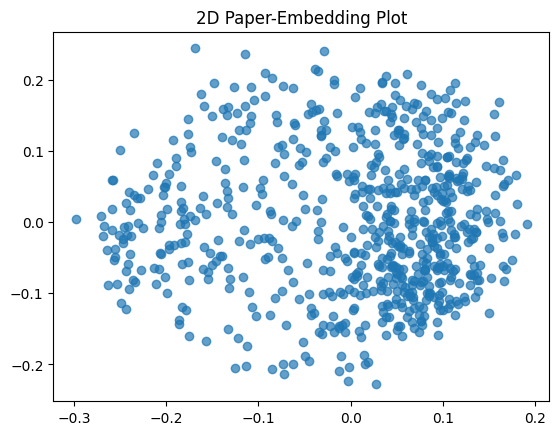

In [19]:
from matplotlib import pyplot as plt

plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], alpha=0.7)
plt.title("2D Paper-Embedding Plot")
plt.show()

---
# 3D Paper plot

In [20]:
reducer = PCA(n_components=3) # Reduce to 3D using PCA
embedding_3d = reducer.fit_transform(all_embeddings)

In [21]:
import random
def random_color():
    return (random.random(), random.random(), random.random())

In [22]:
from sklearn.preprocessing import MinMaxScaler
normalized_embeddings = MinMaxScaler().fit_transform(embedding_3d)
normalized_embeddings.min(), normalized_embeddings.max()

(np.float64(0.0), np.float64(1.0))

In [23]:
# import matplotlib
# matplotlib.use("WebAgg") # for interactive view, execute before

d:\rolling_embedding\.venv\Lib\site-packages\mplcursors\_pick_info.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  paths = scatter.__wrapped__(*args, **kwargs)


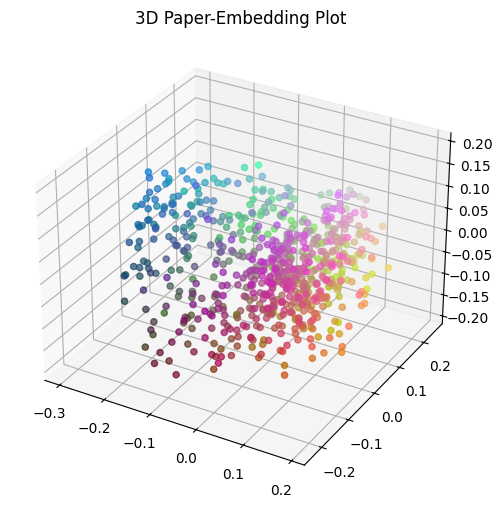

In [24]:
import mplcursors

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=normalized_embeddings, cmap='viridis', alpha=0.7)

ax.set_title("3D Paper-Embedding Plot")
mplcursors.cursor(scatter, hover=True).connect("add", lambda sel: sel.annotation.set_text(labels[sel.index]))
plt.show()